In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
#Verify gpu is being used
#print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

In [3]:
#Paths to datasets
import pathlib
data_dir = pathlib.Path(pathlib.Path.cwd()) / "datasets"
data1_dir = data_dir / "data1"
data2_dir = data_dir / "data2"
data3_dir = data_dir / "data3"
test_data_dir = data_dir / "test"
#print(data_dir)
#print(data1_dir)
#print(data2_dir)
#print(data3_dir)
#print(test_data_dir)

In [4]:
#Parameters for datasets
batch_size = 32
img_height = 256
img_width = 256
model_seed = 5151
validation_split = .2

In [5]:
#Datasets for training from 1st dataset

train_ds1 = tf.keras.utils.image_dataset_from_directory(
data1_dir,
validation_split=validation_split,
subset="training",
seed=model_seed,
image_size = (img_height, img_width),
batch_size = batch_size)

val_ds1 = tf.keras.utils.image_dataset_from_directory(
data1_dir,
validation_split=validation_split,
subset="validation",
seed=model_seed,
image_size=(img_height, img_width),
batch_size=batch_size)

Found 1289 files belonging to 2 classes.
Using 1032 files for training.
Found 1289 files belonging to 2 classes.
Using 257 files for validation.


In [6]:
#Datasets for training from 2nd dataset

train_ds2 = tf.keras.utils.image_dataset_from_directory(
data2_dir,
validation_split=validation_split,
subset="training",
seed=model_seed,
image_size = (img_height, img_width),
batch_size = batch_size)

val_ds2 = tf.keras.utils.image_dataset_from_directory(
data2_dir,
validation_split=validation_split,
subset="validation",
seed=model_seed,
image_size=(img_height, img_width),
batch_size=batch_size)

Found 20000 files belonging to 2 classes.
Using 16000 files for training.
Found 20000 files belonging to 2 classes.
Using 4000 files for validation.


In [7]:
#Datasets for training from 3rd dataset

train_ds3 = tf.keras.utils.image_dataset_from_directory(
data3_dir,
validation_split=validation_split,
subset="training",
seed=model_seed,
image_size = (img_height, img_width),
batch_size = batch_size)

val_ds3 = tf.keras.utils.image_dataset_from_directory(
data3_dir,
validation_split=validation_split,
subset="validation",
seed=model_seed,
image_size=(img_height, img_width),
batch_size=batch_size)

Found 2041 files belonging to 2 classes.
Using 1633 files for training.
Found 2041 files belonging to 2 classes.
Using 408 files for validation.


In [8]:
train_ds4 = train_ds1.concatenate(train_ds2).concatenate(train_ds3)
val_ds4 = val_ds1.concatenate(val_ds2).concatenate(train_ds3)

In [9]:
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_data_dir,
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 14029 files belonging to 2 classes.


In [10]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds1 = train_ds1.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds1 = val_ds1.cache().prefetch(buffer_size=AUTOTUNE)

In [11]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds2 = train_ds2.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds2 = val_ds2.cache().prefetch(buffer_size=AUTOTUNE)

In [12]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds3 = train_ds3.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds3 = val_ds3.cache().prefetch(buffer_size=AUTOTUNE)

In [13]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds4 = train_ds4.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds4 = val_ds4.cache().prefetch(buffer_size=AUTOTUNE)

In [14]:
class_names = ['fake', 'real']

num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='sigmoid'),
  layers.Dense(128, activation='relu'),
  layers.Dense(128, activation='sigmoid'),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

#ADAM, RMSProp, SGD tested
model.compile(optimizer='RMSprop',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#model.summary()


In [15]:
epochs=12

#Change train and val sets depending on datarun
history = model.fit(
  train_ds4,
  validation_data=val_ds4,
  epochs=epochs
)


Epoch 1/12
585/585 [==============================] - 23s 25ms/step - loss: 0.6772 - accuracy: 0.5638 - val_loss: 0.6199 - val_accuracy: 0.6521
Epoch 2/12
585/585 [==============================] - 13s 22ms/step - loss: 0.5651 - accuracy: 0.7123 - val_loss: 0.6271 - val_accuracy: 0.6907
Epoch 3/12
585/585 [==============================] - 12s 21ms/step - loss: 0.4810 - accuracy: 0.7735 - val_loss: 0.5626 - val_accuracy: 0.7324
Epoch 4/12
585/585 [==============================] - 12s 21ms/step - loss: 0.3815 - accuracy: 0.8314 - val_loss: 0.4551 - val_accuracy: 0.7795
Epoch 5/12
585/585 [==============================] - 12s 21ms/step - loss: 0.2829 - accuracy: 0.8837 - val_loss: 0.4399 - val_accuracy: 0.8132
Epoch 6/12
585/585 [==============================] - 12s 21ms/step - loss: 0.1945 - accuracy: 0.9252 - val_loss: 0.3567 - val_accuracy: 0.8557
Epoch 7/12
585/585 [==============================] - 12s 21ms/step - loss: 0.1299 - accuracy: 0.9521 - val_loss: 0.3925 - val_accuracy:

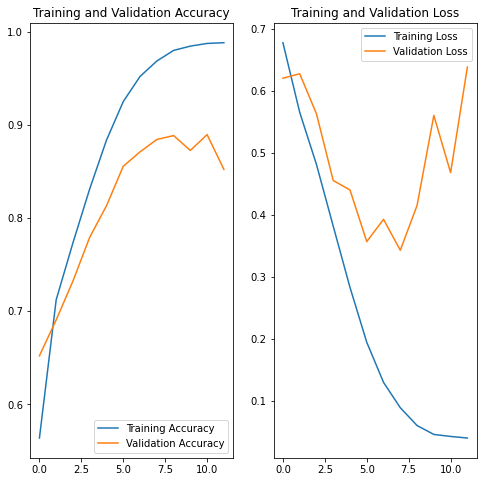

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [17]:
predictions = model.evaluate(val_ds1)
predictions = model.evaluate(val_ds2)
predictions = model.evaluate(val_ds3)
predictions = model.evaluate(val_ds4)
predictions = model.evaluate(test_ds)

439/439 [==============================] - 8s 17ms/step - loss: 4.0845 - accuracy: 0.2008
